# Plots

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import torch

## Average First Try

In [21]:
#checkdir = 'checkpoint/checkpoint_MNISTVM_seed/'
checkdir = 'checkpoint/checkpoint_MNISTVM_seed2/'

In [29]:
averagesgd = 0
averagehwa10 = 0
averagehwa50 = 0
averagehwa100 = 0

for seed0 in [1234, 5678, 2893, 3794, 9788,23933,38437]:
#for seed0 in [1234, 5678, 2893, 3794, 9788]:
    sgdcyclical = checkdir + 'trainlogLeNet5_optsgd_lr0.001_bs128_avgp10_cyclical_seed{}.txt'.format(seed0)
    #sgdcyclical = checkdir + 'trainlogLeNet5_optsgd_lr0.01_bs128_avgp10_cyclical_seed{}.txt'.format(seed0)
    hwa10cyclical = checkdir + 'trainlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp10_cyclical_seed{}.txt'.format(seed0)
    hwa50cyclical = checkdir + 'trainlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp50_cyclical_seed{}.txt'.format(seed0)
    hwa100cyclical = checkdir + 'trainlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp100_cyclical_seed{}.txt'.format(seed0)
    runsgd = pd.read_csv(sgdcyclical, index_col = 0, sep = '\t')
    runhwa10 = pd.read_csv(hwa10cyclical, index_col = 0, sep = '\t')
    runhwa50 = pd.read_csv(hwa50cyclical, index_col = 0, sep = '\t')
    runhwa100 = pd.read_csv(hwa100cyclical, index_col = 0, sep = '\t')
    averagesgd = averagesgd + runsgd
    averagehwa10 = averagehwa10 + runhwa10
    averagehwa50 = averagehwa50 + runhwa50
    averagehwa100 = averagehwa100 + runhwa100

averagesgd = averagesgd/5
averagehwa10 = averagehwa10/5
averagehwa50 = averagehwa50/5
averagehwa100 = averagehwa100/5

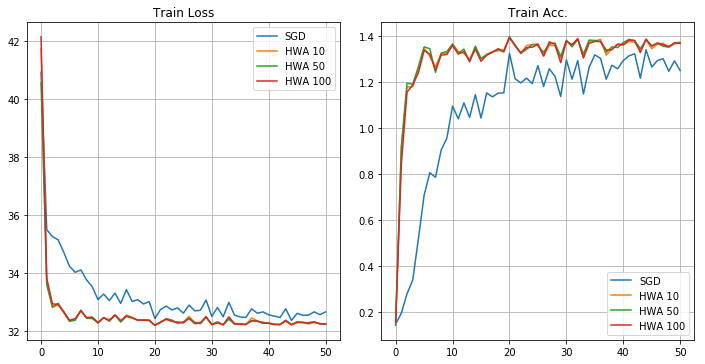

In [30]:
num_epochs=50
every = len(averagesgd['Train Loss'])/num_epochs

#xaxis = range(len(runhwa50['Train Loss']))
xaxis = range(num_epochs+1)
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.plot(xaxis, averagesgd['Train Loss'].iloc[::every], label='SGD')
plt.plot(xaxis, averagehwa10['Train Loss'].iloc[::every], label='HWA 10')
plt.plot(xaxis, averagehwa50['Train Loss'].iloc[::every], label='HWA 50')
plt.plot(xaxis, averagehwa100['Train Loss'].iloc[::every], label='HWA 100')
#plt.ylim(22.8, 23.6)
plt.title('Train Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xaxis, averagesgd['Train Acc.'].iloc[::every], label='SGD')
plt.plot(xaxis, averagehwa10['Train Acc.'].iloc[::every], label='HWA 10')
plt.plot(xaxis, averagehwa50['Train Acc.'].iloc[::every], label='HWA 50')
plt.plot(xaxis, averagehwa100['Train Acc.'].iloc[::every], label='HWA 100')
#plt.ylim(0.8, 1.1)
plt.title('Train Acc.')
plt.grid(True)
plt.legend()

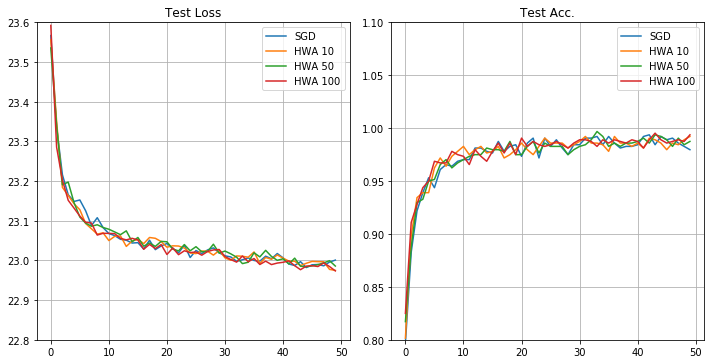

In [23]:
averagesgd = 0
averagehwa10 = 0
averagehwa50 = 0
averagehwa100 = 0

for seed0 in [1234, 5678, 2893, 3794, 9788]:
    sgdcyclical = checkdir + 'testlogLeNet5_optsgd_lr0.01_bs128_avgp10_cyclical_seed{}.txt'.format(seed0)
    hwa10cyclical = checkdir + 'testlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp10_cyclical_seed{}.txt'.format(seed0)
    hwa50cyclical = checkdir + 'testlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp50_cyclical_seed{}.txt'.format(seed0)
    hwa100cyclical = checkdir + 'testlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp100_cyclical_seed{}.txt'.format(seed0)
    runsgd = pd.read_csv(sgdcyclical, index_col = 0, sep = '\t')
    runhwa10 = pd.read_csv(hwa10cyclical, index_col = 0, sep = '\t')
    runhwa50 = pd.read_csv(hwa50cyclical, index_col = 0, sep = '\t')
    runhwa100 = pd.read_csv(hwa100cyclical, index_col = 0, sep = '\t')
    averagesgd = averagesgd + runsgd
    averagehwa10 = averagehwa10 + runhwa10
    averagehwa50 = averagehwa50 + runhwa50
    averagehwa100 = averagehwa100 + runhwa100

averagesgd = averagesgd/5
averagehwa10 = averagehwa10/5
averagehwa50 = averagehwa50/5
averagehwa100 = averagehwa100/5


num_epochs=50
every = len(runsgd['Test Loss'])/num_epochs

#xaxis = range(len(runhwa50['Train Loss']))
xaxis = range(num_epochs)
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.plot(xaxis, averagesgd['Test Loss'].iloc[::every], label='SGD')
plt.plot(xaxis, averagehwa10['Test Loss'].iloc[::every], label='HWA 10')
plt.plot(xaxis, averagehwa50['Test Loss'].iloc[::every], label='HWA 50')
plt.plot(xaxis, averagehwa100['Test Loss'].iloc[::every], label='HWA 100')
plt.ylim(22.8, 23.6)
plt.title('Test Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xaxis, averagesgd['Test Acc.'].iloc[::every], label='SGD')
plt.plot(xaxis, averagehwa10['Test Acc.'].iloc[::every], label='HWA 10')
plt.plot(xaxis, averagehwa50['Test Acc.'].iloc[::every], label='HWA 50')
plt.plot(xaxis, averagehwa100['Test Acc.'].iloc[::every], label='HWA 100')
plt.ylim(0.8, 1.1)
plt.title('Test Acc.')
plt.grid(True)
plt.legend()


## Average SecondTry

In [3]:
####Cyclical variant
sgdcyclical = checkdir + 'trainlogLeNet5_optsgd_lr0.01_bs128_avgp10_cyclical_seed2893.txt'
hwa10cyclical = checkdir + 'trainlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp10_cyclical_seed2893.txt'
hwa50cyclical = checkdir + 'trainlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp50_cyclical_seed2893.txt'
hwa100cyclical = checkdir + 'trainlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp100_cyclical_seed2893.txt'

/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


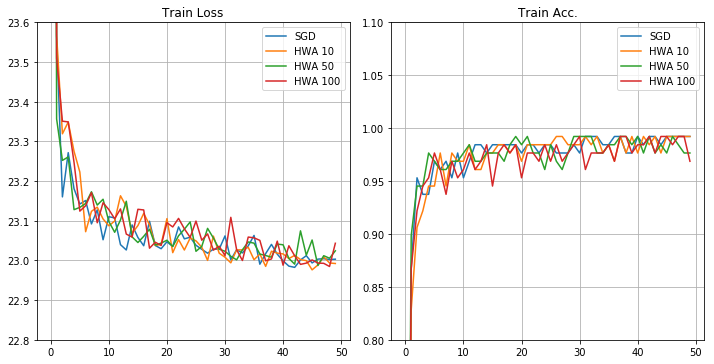

In [4]:
runsgd = pd.read_table(sgdcyclical, index_col = 0, sep = '\t')
runhwa10 = pd.read_table(hwa10cyclical, index_col = 0, sep = '\t')
runhwa50 = pd.read_table(hwa50cyclical, index_col = 0, sep = '\t')
runhwa100 = pd.read_table(hwa100cyclical, index_col = 0, sep = '\t')

num_epochs=50
every = len(runsgd['Train Loss'])/num_epochs

#xaxis = range(len(runhwa50['Train Loss']))
xaxis = range(num_epochs)
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.plot(xaxis, runsgd['Train Loss'].iloc[::every], label='SGD')
plt.plot(xaxis, runhwa10['Train Loss'].iloc[::every], label='HWA 10')
plt.plot(xaxis, runhwa50['Train Loss'].iloc[::every], label='HWA 50')
plt.plot(xaxis, runhwa100['Train Loss'].iloc[::every], label='HWA 100')
plt.ylim(22.8, 23.6)
plt.title('Train Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xaxis, runsgd['Train Acc.'].iloc[::every], label='SGD')
plt.plot(xaxis, runhwa10['Train Acc.'].iloc[::every], label='HWA 10')
plt.plot(xaxis, runhwa50['Train Acc.'].iloc[::every], label='HWA 50')
plt.plot(xaxis, runhwa100['Train Acc.'].iloc[::every], label='HWA 100')
plt.ylim(0.8, 1.1)
plt.title('Train Acc.')
plt.grid(True)
plt.legend()

/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


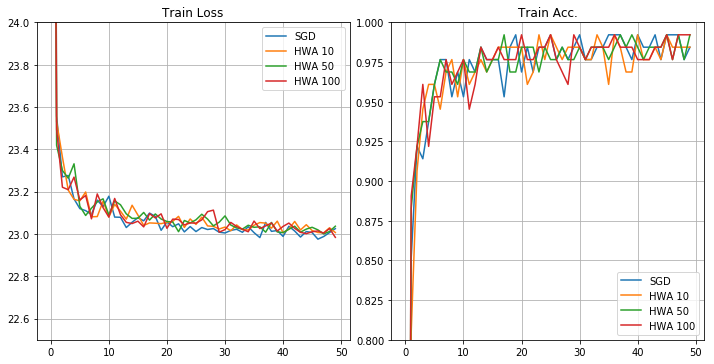

In [6]:
runsgd = pd.read_table(sgd, index_col = 0, sep = '\t')
runhwa10 = pd.read_table(hwa10, index_col = 0, sep = '\t')
runhwa50 = pd.read_table(hwa50, index_col = 0, sep = '\t')
runhwa100 = pd.read_table(hwa100, index_col = 0, sep = '\t')

num_epochs=50
every = len(runsgd['Train Loss'])/num_epochs

#xaxis = range(len(runhwa50['Train Loss']))
xaxis = range(num_epochs)
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.plot(xaxis, runsgd['Train Loss'].iloc[::every], label='SGD')
plt.plot(xaxis, runhwa10['Train Loss'].iloc[::every], label='HWA 10')
plt.plot(xaxis, runhwa50['Train Loss'].iloc[::every], label='HWA 50')
plt.plot(xaxis, runhwa100['Train Loss'].iloc[::every], label='HWA 100')
plt.ylim(22.5, 24)
plt.title('Train Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xaxis, runsgd['Train Acc.'].iloc[::every], label='SGD')
plt.plot(xaxis, runhwa10['Train Acc.'].iloc[::every], label='HWA 10')
plt.plot(xaxis, runhwa50['Train Acc.'].iloc[::every], label='HWA 50')
plt.plot(xaxis, runhwa100['Train Acc.'].iloc[::every], label='HWA 100')
plt.ylim(0.8, 1)
plt.title('Train Acc.')
plt.grid(True)
plt.legend()

In [8]:
#Training
sgd = 'checkpoint/checkpoint_MNISTVM_normalLR/testlogLeNet5_optsgd_lr0.01_bs128_avgp10.txt'
hwa10 = 'checkpoint/checkpoint_MNISTVM_normalLR/testlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp10.txt'
hwa50 = 'checkpoint/checkpoint_MNISTVM_normalLR/testlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp50.txt'
hwa100 = 'checkpoint/checkpoint_MNISTVM_normalLR/testlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp100.txt'


####Cyclical variant
sgdcyclical = 'checkpoint/checkpoint_MNISTVM_cyclicalLR/testlogLeNet5_optsgd_lr0.01_bs128_avgp10_cyclical.txt'
hwa10cyclical = 'checkpoint/checkpoint_MNISTVM_cyclicalLR/testlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp10_cyclical.txt'
hwa50cyclical = 'checkpoint/checkpoint_MNISTVM_cyclicalLR/testlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp50_cyclical.txt'
hwa100cyclical = 'checkpoint/checkpoint_MNISTVM_cyclicalLR/testlogLeNet5_opthwa_sgd_lr0.01_bs128_avgp100_cyclical.txt'

/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


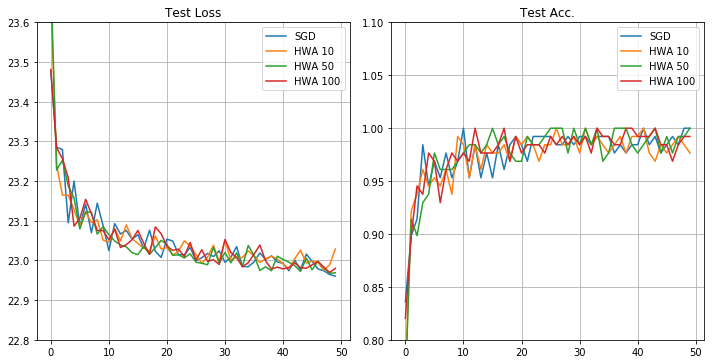

In [10]:
runsgd = pd.read_table(sgdcyclical, index_col = 0, sep = '\t')
runhwa10 = pd.read_table(hwa10cyclical, index_col = 0, sep = '\t')
runhwa50 = pd.read_table(hwa50cyclical, index_col = 0, sep = '\t')
runhwa100 = pd.read_table(hwa100cyclical, index_col = 0, sep = '\t')

num_epochs=50
every = len(runsgd['Test Loss'])/num_epochs

#xaxis = range(len(runhwa50['Train Loss']))
xaxis = range(num_epochs)
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.plot(xaxis, runsgd['Test Loss'].iloc[::every], label='SGD')
plt.plot(xaxis, runhwa10['Test Loss'].iloc[::every], label='HWA 10')
plt.plot(xaxis, runhwa50['Test Loss'].iloc[::every], label='HWA 50')
plt.plot(xaxis, runhwa100['Test Loss'].iloc[::every], label='HWA 100')
plt.ylim(22.8, 23.6)
plt.title('Test Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xaxis, runsgd['Test Acc.'].iloc[::every], label='SGD')
plt.plot(xaxis, runhwa10['Test Acc.'].iloc[::every], label='HWA 10')
plt.plot(xaxis, runhwa50['Test Acc.'].iloc[::every], label='HWA 50')
plt.plot(xaxis, runhwa100['Test Acc.'].iloc[::every], label='HWA 100')
plt.ylim(0.8, 1.1)
plt.title('Test Acc.')
plt.grid(True)
plt.legend()

/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/karimimohammedbelhal/Desktop/ML_Research/masterenv/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


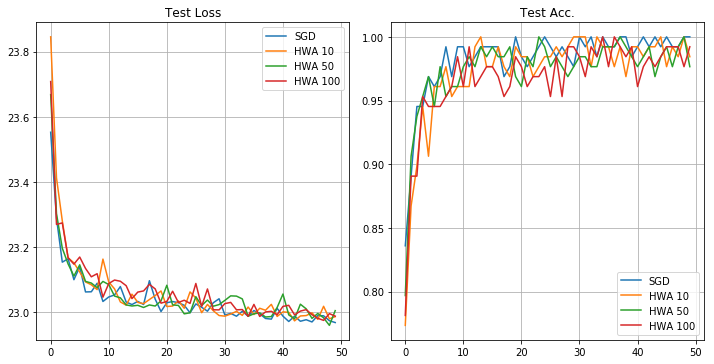

In [11]:
runsgd = pd.read_table(sgd, index_col = 0, sep = '\t')
runhwa10 = pd.read_table(hwa10, index_col = 0, sep = '\t')
runhwa50 = pd.read_table(hwa50, index_col = 0, sep = '\t')
runhwa100 = pd.read_table(hwa100, index_col = 0, sep = '\t')

num_epochs=50
every = len(runsgd['Test Loss'])/num_epochs

#xaxis = range(len(runhwa50['Train Loss']))
xaxis = range(num_epochs)
f, axs = plt.subplots(2,2,figsize=(10,5))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.plot(xaxis, runsgd['Test Loss'].iloc[::every], label='SGD')
plt.plot(xaxis, runhwa10['Test Loss'].iloc[::every], label='HWA 10')
plt.plot(xaxis, runhwa50['Test Loss'].iloc[::every], label='HWA 50')
plt.plot(xaxis, runhwa100['Test Loss'].iloc[::every], label='HWA 100')

plt.title('Test Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xaxis, runsgd['Test Acc.'].iloc[::every], label='SGD')
plt.plot(xaxis, runhwa10['Test Acc.'].iloc[::every], label='HWA 10')
plt.plot(xaxis, runhwa50['Test Acc.'].iloc[::every], label='HWA 50')
plt.plot(xaxis, runhwa100['Test Acc.'].iloc[::every], label='HWA 100')
plt.title('Test Acc.')
plt.grid(True)
plt.legend()